### Задание

1. Загрузите и предобработайте датасет.
2. Проведите EDA.
3. Постройте прогнозные модели с учётом упрощения типа данных (изначально датасет под multilabel multiclass) и использованием подходящей схемы валидации: multilabel binary classification, binary classification.
4. Выберите и обоснуйте лучший подход.

### Загрузка данных

In [1]:
import pandas as pd

In [154]:
# Названия столбцов согласно описанию на сайте UCI
columns = [
    'ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity',
    'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS',
    'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
    'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
    'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA'
]

In [166]:
df = pd.read_csv('drug_consumption.data', header=None, names=columns)
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

### Предобработка данных

In [167]:
# Удаление идентификатора, так как он не несет полезной информации
df.drop(columns=['ID'], inplace=True)

In [168]:
# Преобразуем признаки употребления наркотиков в бинарные (например, 0 - не употреблял, 1 - употреблял)
drug_columns = columns[13:]  # Начиная с колонки "Alcohol" и до конца

In [169]:
# Замена категорий на бинарные значения: 'CL0' (никогда) = 0, 'CL1-CL6' (употреблял когда-то или недавно) = 1
df[drug_columns] = df[drug_columns].map(lambda x: 0 if x == 'CL0' else 1)

In [170]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,1,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,1,0,1,1,0,1,0,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,1,0,0,0,0,1,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,1,1,0,0


Необходимо привести категорийные признаки к соответствующему типу данный для дальнейшей работы

In [171]:
# Определение категориальных признаков
categorical_columns = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']

# Преобразование категориальных признаков в отдельные бинарные признаки (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=categorical_columns, dtype=int)

In [172]:
df_encoded.head()

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,...,Country_0.21128,Country_0.24923,Country_0.96082,Ethnicity_-1.10702,Ethnicity_-0.50212,Ethnicity_-0.31685,Ethnicity_-0.22166,Ethnicity_0.1144,Ethnicity_0.126,Ethnicity_1.90725
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,...,0,0,1,0,0,1,0,0,0,0
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,1,...,0,0,1,0,0,1,0,0,0,0


In [173]:
df_encoded.columns

Index(['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS',
       'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
       'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
       'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA', 'Age_-0.95197',
       'Age_-0.07854', 'Age_0.49788', 'Age_1.09449', 'Age_1.82213',
       'Age_2.59171', 'Gender_-0.48246', 'Gender_0.48246',
       'Education_-2.43591', 'Education_-1.7379', 'Education_-1.43719',
       'Education_-1.22751', 'Education_-0.61113', 'Education_-0.05921',
       'Education_0.45468', 'Education_1.16365', 'Education_1.98437',
       'Country_-0.57009', 'Country_-0.46841', 'Country_-0.28519',
       'Country_-0.09765', 'Country_0.21128', 'Country_0.24923',
       'Country_0.96082', 'Ethnicity_-1.10702', 'Ethnicity_-0.50212',
       'Ethnicity_-0.31685', 'Ethnicity_-0.22166', 'Ethnicity_0.1144',
       'Ethnicity_0.126', 'Ethnicity_1.90725'],
      dtype='object')

### Exploratory Data Analysis

In [11]:
# Импортируем необходимые библиотеки для визуализации и анализа данных
import seaborn as sns
import matplotlib.pyplot as plt

In [196]:
# Установка стиля seaborn для графиков
sns.set(style='whitegrid') 

#### Зависимость употребления наркотических веществ от пола

In [13]:
# Добавим новый признак, показывающий, употреблял ли человек хотя бы 1 наркотик
df['AnyDrug'] = df[drug_columns].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

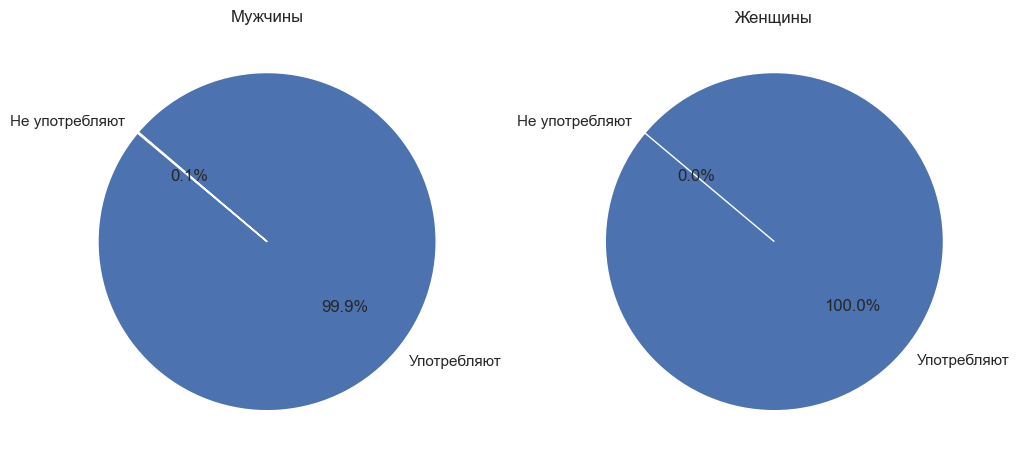

In [14]:
# Построим диаграмму употребления наркотиков среди мужчин и женщин
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Употребляющие наркотики
males_drug_users = df[(df['Gender'] == -0.48246) & (df['AnyDrug'] != 0)]
females_drug_users = df[(df['Gender'] == 0.48246) & (df['AnyDrug'] != 0)]

# Круговая диаграмма для мужчин
ax[0].pie(
    [len(males_drug_users), len(df[df['Gender'] == -0.48246]) - len(males_drug_users)],
    labels=['Употребляют', 'Не употребляют'],
    autopct='%1.1f%%', startangle=140
)
ax[0].set_title('Мужчины')

# Круговая диаграмма для женщин
ax[1].pie(
    [len(females_drug_users), len(df[df['Gender'] == 0.48246]) - len(females_drug_users)],
    labels=['Употребляют', 'Не употребляют'],
    autopct='%1.1f%%', startangle=140
)
ax[1].set_title('Женщины')

plt.show()

In [15]:
# Посмотрим, кто составил эти 0.1%
df[drug_columns + ['AnyDrug']][df['AnyDrug'] == 0]

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,AnyDrug
1277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Зависимость употребления наркотических веществ от уровня образования

In [16]:
# Подсчёт количества употребляющих наркотики в зависимости от уровня образования
drug_use_by_education = df.groupby('Education')[['AnyDrug']].sum().reset_index()

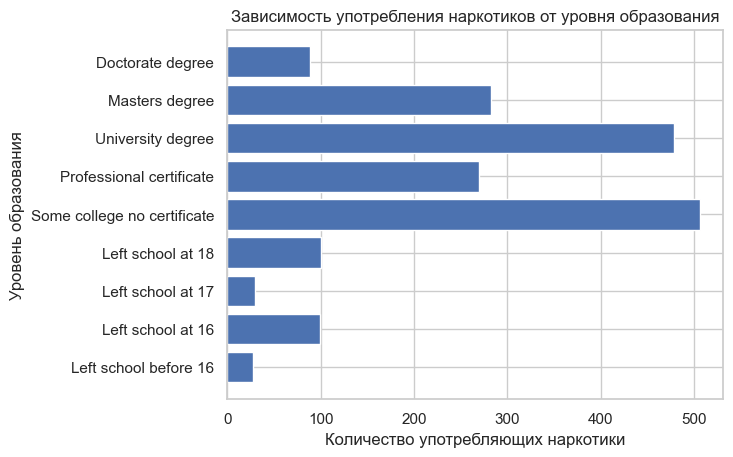

In [17]:
# Построение столбчатой диаграммы
education_labels = [
    'Left school before 16', 'Left school at 16', 'Left school at 17', 'Left school at 18',
    'Some college no certificate', 'Professional certificate', 'University degree', 'Masters degree', 'Doctorate degree'
]
plt.barh(education_labels, drug_use_by_education['AnyDrug'])
plt.xlabel('Количество употребляющих наркотики')
plt.ylabel('Уровень образования')
plt.title('Зависимость употребления наркотиков от уровня образования')
plt.show()

#### Зависимость употребления наркотических веществ от возраста

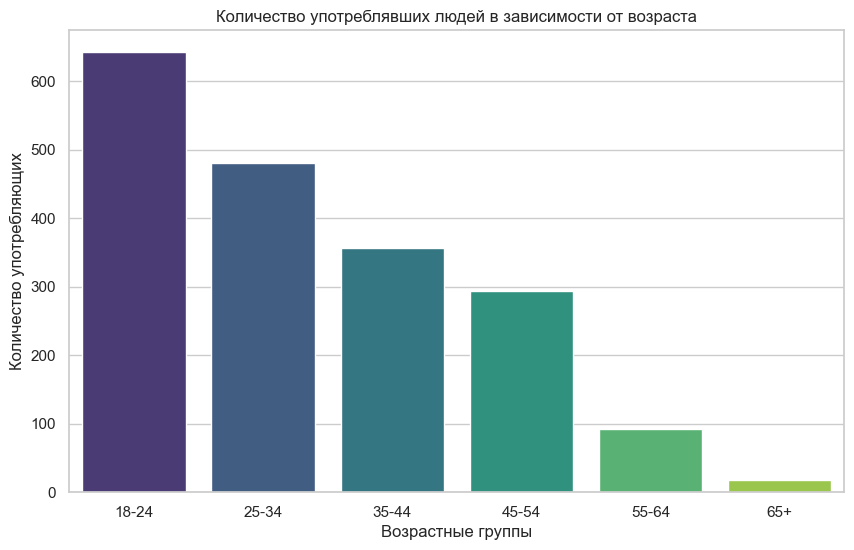

In [18]:
# Подсчет количества употребляющих наркотики в зависимости от возраста
drug_use_by_age = df.groupby('Age')[['AnyDrug']].sum().reset_index()

# Применение возрастной карты
age_map = {
    -0.95197: '18-24',
    -0.07854: '25-34',
    0.49788: '35-44',
    1.09449: '45-54',
    1.82213: '55-64',
    2.59171: '65+'
}
drug_use_by_age['Age'] = drug_use_by_age['Age'].map(age_map)

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='AnyDrug', data=drug_use_by_age, palette='viridis')
plt.title('Количество употреблявших людей в зависимости от возраста')
plt.xlabel('Возрастные группы')
plt.ylabel('Количество употребляющих')
plt.show()

#### Статистика употребления различных наркотических веществ

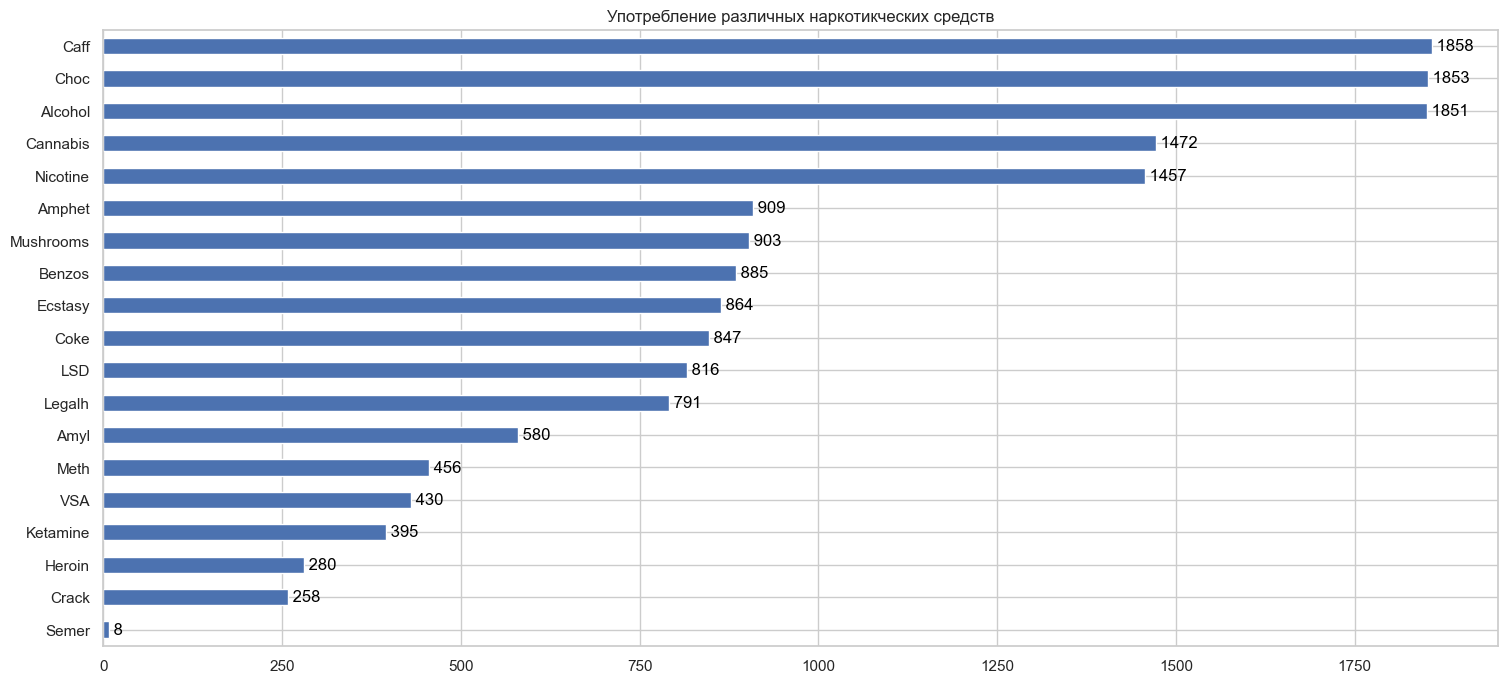

In [197]:
# Создание диаграммы
plt.figure(figsize=(18, 8))
sum_values = df[drug_columns].sum().sort_values()
ax = mean_values.plot(kind='barh')
plt.title('Употребление различных наркотикческих средств')

# Добавление аннотаций с количеством употребляющих
for i, (value, name) in enumerate(zip(sum_values, sum_values.index)):
    ax.text(value, i, f' {value}', va='center', fontsize=12, color='black')

plt.show()

### Построение модели

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [178]:
# Разделение датасета на обучающую и тестовую выборки
X = df_encoded.drop(columns=drug_columns)
y = df_encoded[drug_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
# Создание словаря для хранения моделей и списка для метрик
models = {}
metrics = []

for drug in drug_columns:
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train[drug])
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    models[drug] = model
    precision, recall, f1, _ = precision_recall_fscore_support(y_test[drug], y_pred, average='binary', zero_division=0)
    
    metrics.append({
        'drug': drug,
        'accuracy': accuracy_score(y_test[drug], y_pred),
        'roc_auc': roc_auc_score(y_test[drug], y_pred_proba),
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

In [180]:
# Создание DataFrame из списка метрик
metrics_df = pd.DataFrame(metrics)
metrics_df

,drug,accuracy,roc_auc,precision,recall,f1_score
0,Alcohol,0.981432,0.765251,0.981432,1.000000,0.990629
1,Amphet,0.681698,0.747604,0.680473,0.635359,0.657143
2,Amyl,0.732095,0.713436,0.627119,0.318966,0.422857
3,Benzos,0.702918,0.767086,0.698718,0.626437,0.660606
4,Caff,0.986737,0.800538,0.986737,1.000000,0.993324
5,Cannabis,0.801061,0.855510,0.835404,0.924399,0.877651
6,Choc,0.989390,0.335121,0.989390,1.000000,0.994667
7,Coke,0.687003,0.734506,0.614379,0.614379,0.614379
8,Crack,0.885942,0.764239,0.500000,0.069767,0.122449
9,Ecstasy,0.694960,0.767638,0.664634,0.644970,0.654655


In [ ]:
# Нет особого смысла пытаться предсказывать признак "Semer" в связи с малым количеством данных (8 из 1885)
# К тому же, "Semer" - фиктивный препарат, который был введен для выявления лиц, злоупотребляющих наркотиками (из описания датасета)
# Так же особой точности предсказаний не стоит ожидать от признаков "Crack", "Heroin", "Ketamine", "VSA", "Meth" и "Amyl"

Обычная бинарная классификация может быть полезна, если нужно точно прогнозировать употребление одного конкретного вещества, что может дать более специфические модели и результаты.